In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh as largest_eigh


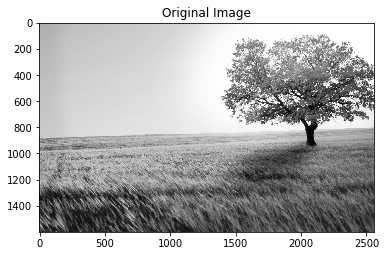

In [2]:
# Convertiing RGB image to gray
# function converting rgb to gray scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

# Reading image and plotting
img = plt.imread('44.jpg')
# Calling rgb2gray function
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.title('Original Image')
plt.show()

In [3]:
print(gray.shape)
print(img.shape)
gray[:5, :5]

(1600, 2560)
(1600, 2560, 3)


array([[179.088, 180.118, 181.148, 181.137, 181.137],
       [180.107, 181.148, 181.148, 181.148, 181.137],
       [181.137, 181.148, 181.148, 181.148, 181.148],
       [181.148, 181.148, 180.118, 180.118, 180.118],
       [181.148, 181.148, 180.118, 180.118, 180.118]])

In [4]:
# PCA

# Centering the features
X_mean = np.mean(gray, axis = 0, keepdims = True)
X = gray - X_mean
print("Centerd data : \n ", X[:5,:5])

# Finding covariance matrix
M = gray.shape[0]
N = gray.shape[1]
covariance_matrix = 1/M * np.dot(X.T, X)
print("Shape of covariance matrix : ", covariance_matrix.shape)

# Finding eigen values and corresponding eigen vectors
eigenValues, eigenVectors = largest_eigh(covariance_matrix, eigvals=(0, N-1))
print("No of eigen values : ", len(eigenValues))


Centerd data : 
  [[14.74052875 16.04112562 17.4390225  17.60416312 17.39552875]
 [15.75952875 17.07112562 17.4390225  17.61516312 17.39552875]
 [16.78952875 17.07112562 17.4390225  17.61516312 17.40652875]
 [16.80052875 17.07112562 16.4090225  16.58516312 16.37652875]
 [16.80052875 17.07112562 16.4090225  16.58516312 16.37652875]]
Shape of covariance matrix :  (2560, 2560)
No of eigen values :  2560


In [0]:
# Descending order
eig = []
v   = []
for i in reversed(range(N)):
  eig.append(eigenValues[i]) 
  v .append(eigenVectors[:,i])

v = np.array(v)
v = v.T

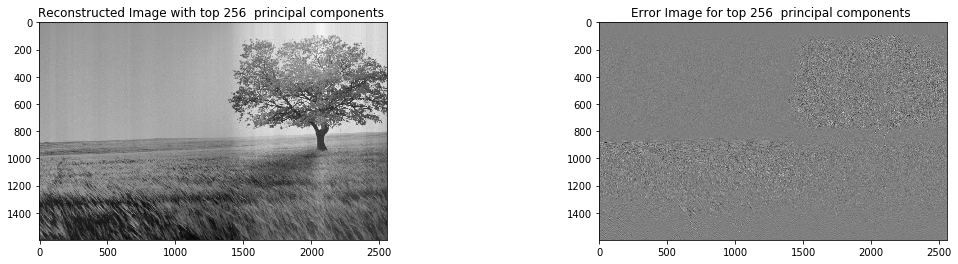

Frobenius norm for top 256 principal components is :  338100.095145  
The quality of reconstructed image using frobenius norm : 0.934522 


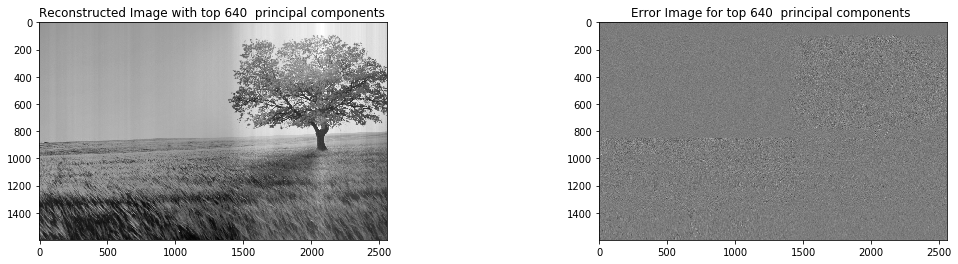

Frobenius norm for top 640 principal components is :  337852.925982  
The quality of reconstructed image using frobenius norm : 0.933839 


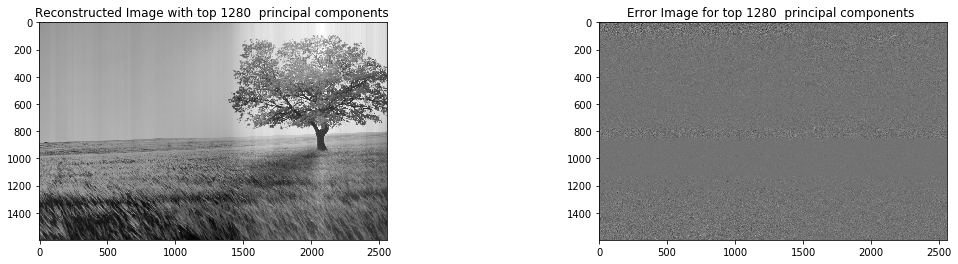

Frobenius norm for top 1280 principal components is :  337836.172876  
The quality of reconstructed image using frobenius norm : 0.933793 


In [10]:
#  Taking top N principal componenets:
error = []
top_N = [int(N*0.1), int(N*0.25), int(N*0.5)]
# top_N = [1280]
for i in top_N:
  re_img = np.dot(X,v[:,0:i])
  re_img = np.dot(re_img, v[:,0:i].T)
  plt.subplot(121)
  plt.imshow(re_img, cmap = plt.get_cmap('gray'))
  plt.title('Reconstructed Image with top %i  principal components ' %(i))
  # plt.show()
  error_img = np.dot(X,v[:,i:N])
  error_img = np.dot(error_img, v[:,i:N].T)
  plt.subplot(122)
  plt.imshow(error_img, cmap = plt.get_cmap('gray'))
  plt.title('Error Image for top %i  principal components ' %(i))
  plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)
  plt.show()
  
  # Frobenius norm
  frobenius = gray - re_img
  frobenius = np.sum(frobenius**2)
  frobenius = np.sqrt(frobenius)
  img_sq = np.sum(gray**2)
  error.append(frobenius)
  print("Frobenius norm for top %i principal components is :  %f  " %(i, (frobenius)))
  print("The quality of reconstructed image using frobenius norm : %f " %(frobenius/np.sqrt(img_sq)))


In [0]:
img_s

Text(0.5, 1.0, 'N vs Reconstruction error')

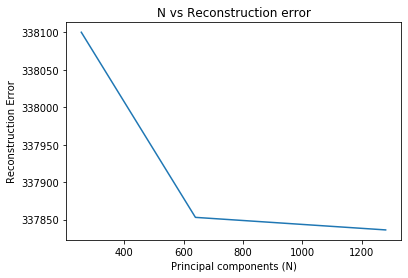

In [8]:
plt.plot(top_N, error)
plt.xlabel("Principal components (N)")
plt.ylabel("Reconstruction Error")
plt.title("N vs Reconstruction error")

In [0]:
# Random 10% vectors
def random_vec(v):
  rng =np.random.uniform(0,2560, 255).astype(int)
  rng = np.sort(rng)
  rng  = rng[::-1]
  error_v = v.copy()
  random_v = v[:,np.random.uniform(0,2560,1).astype(int)]
  x_list = []

  for i in rng:
    if i not in x_list:
      random_v = np.column_stack((random_v, v[:,i]))
      error_v = np.delete(error_v, i, axis =1)
    x_list.append(i)
  return random_v, error_v





In [0]:
random_v, error_v = random_vec(v)
re_img = np.dot(X,random_v)
re_img = np.dot(re_img, random_v.T)

error_img = np.dot(X,error_v)
error_img = np.dot(error_img, error_v.T)
for i in range(10):
  random_v, error_v = random_vec(v)
  a = np.dot(X,random_v)
  re_img += np.dot(a, random_v.T)

  b = np.dot(X,error_v)
  error_img += np.dot(b, error_v.T)

re_img = re_img/10
error_img = error_img/10


plt.subplot(121)
plt.imshow(re_img, cmap = plt.get_cmap('gray'))
plt.title('Reconstructed Image with random 256  principal components ')
plt.subplot(122)
plt.imshow(error_img, cmap = plt.get_cmap('gray'))
plt.title('Error Image for random 256  principal components ')
plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)
plt.show()


In [0]:
zz = np.random.standard_normal((3,3))
zz


In [0]:
for i in [2,1]:
  zz = np.delete(zz, i , axis = 1)

In [0]:
zz